<a href="https://colab.research.google.com/github/vemularoshan/cs666student/blob/main/Copy_of_CS666_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

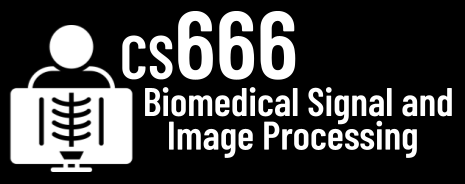
#Assignment 2

In [1]:
### ROSHAN VEMULA

In [2]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

In [4]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging.
# EEG data from an electrode cap was acquired simultaneously with the MEG.

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was
# presented at the center of the visual field. The subject was asked to press a
# key with the right index finger as soon as possible after the appearance of the face.

In [5]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** Analyze the data. [20 Points]


In [6]:
# How many EEG channels were used when acquiring the data?
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: 59

In [7]:
raw.info

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


In [8]:
# TODO What is the sampling frequency of this data?
# TODO: YOUR ANSWER
#600.61Hz

In [9]:
# TODO What is the total duration of the measurement?
# TODO: YOUR ANSWER
print(f"Total duration of measurement:  {raw.n_times / raw.info['sfreq']} s")

Total duration of measurement:  277.7 s


**Task 2:** Let's look at some channels! [20 Points]

Using matplotlib as 2D backend.


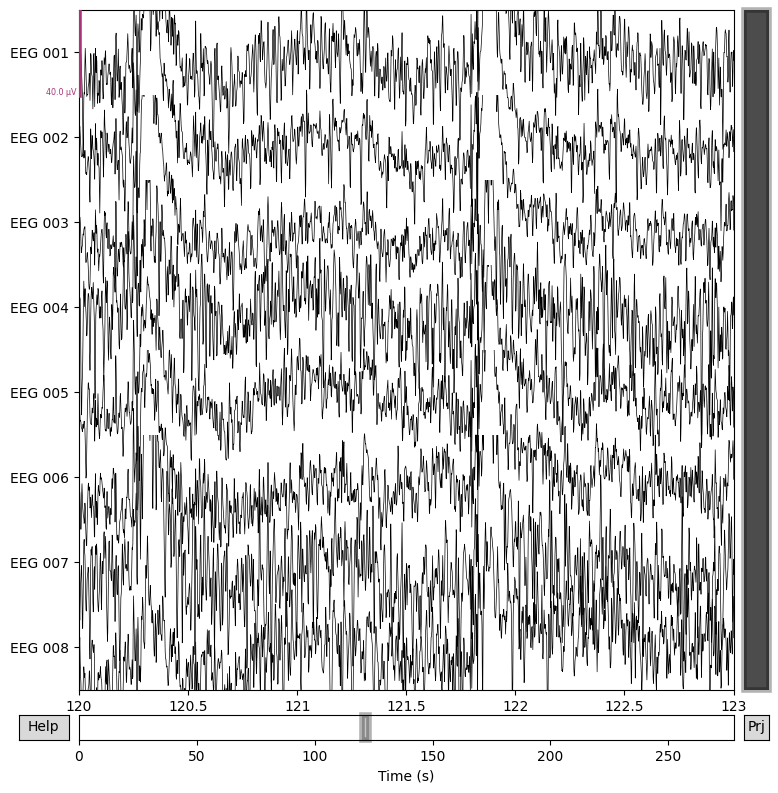

In [10]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

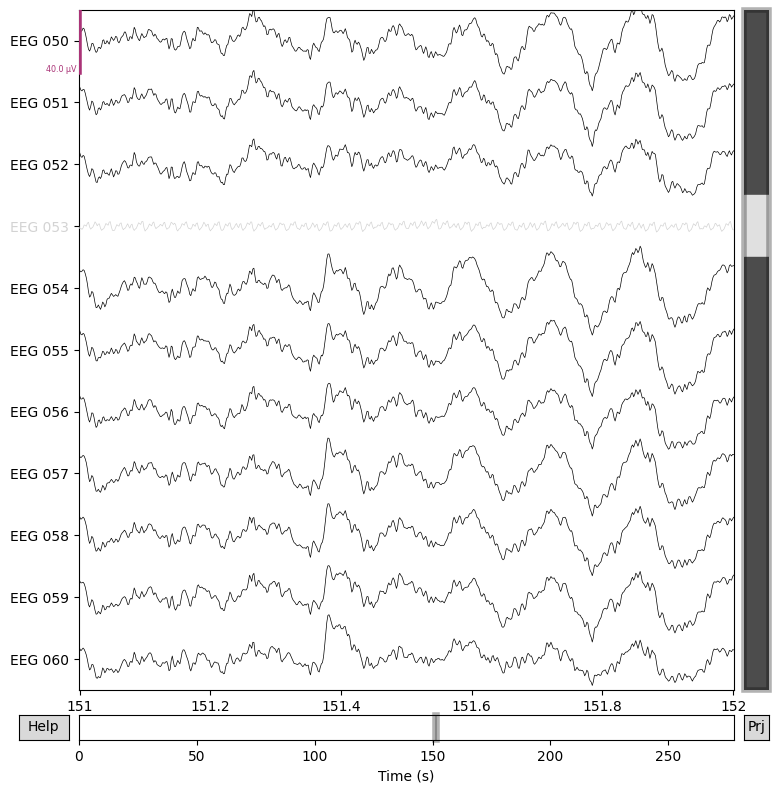

In [11]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg50to60 = raw.plot(order=chan_idxs, start=151, duration=1)

In [12]:
# TODO: Do you see a bad channel? If yes, which one?
# TODO: Sure, I can see that the bad channel is EEG 053.

In [13]:
# TODO: Please calculate the maximum value of the bad channel and compare it
# against a good channel. How would you detect a bad channel programmatically?
# Hint: See https://mne.tools/dev/generated/mne.io.Raw.html#mne.io.Raw to access
#       individual channels

In [14]:
bad_channel_idx = raw.ch_names.index('EEG 053')
good_channel_idx = raw.ch_names.index('EEG 052')

bad_channel_data = raw.get_data()[bad_channel_idx]
good_channel_data = raw.get_data()[good_channel_idx]

bad_channel_max = np.max(bad_channel_data)
good_channel_max = np.max(good_channel_data)

print(f"Maximum value of bad channel: {bad_channel_max}")
print(f"Maximum value of good channel: {good_channel_max}")

Maximum value of bad channel: 6.10056150396332e-05
Maximum value of good channel: 0.0001574162318496164


 Analyzing statistical properties or signal quality metrics of individual channels to identify those exhibiting abnormal characteristics, often deviating from the dataset's overall pattern. EEG 053 showed abnormally high maximum value

**Task 3:** How long between event and brain activity? [25 Points]

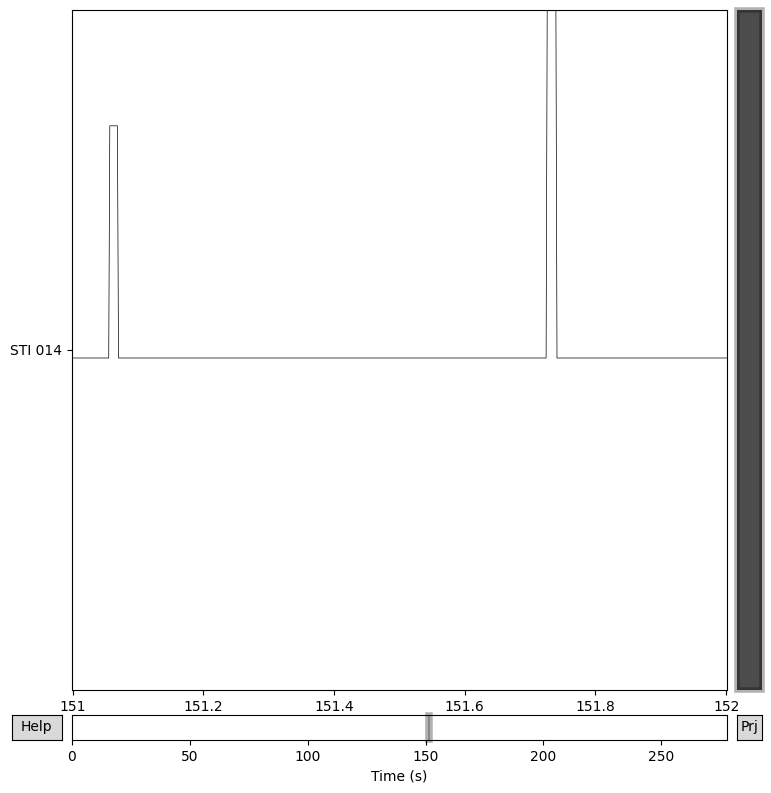

In [15]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [16]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

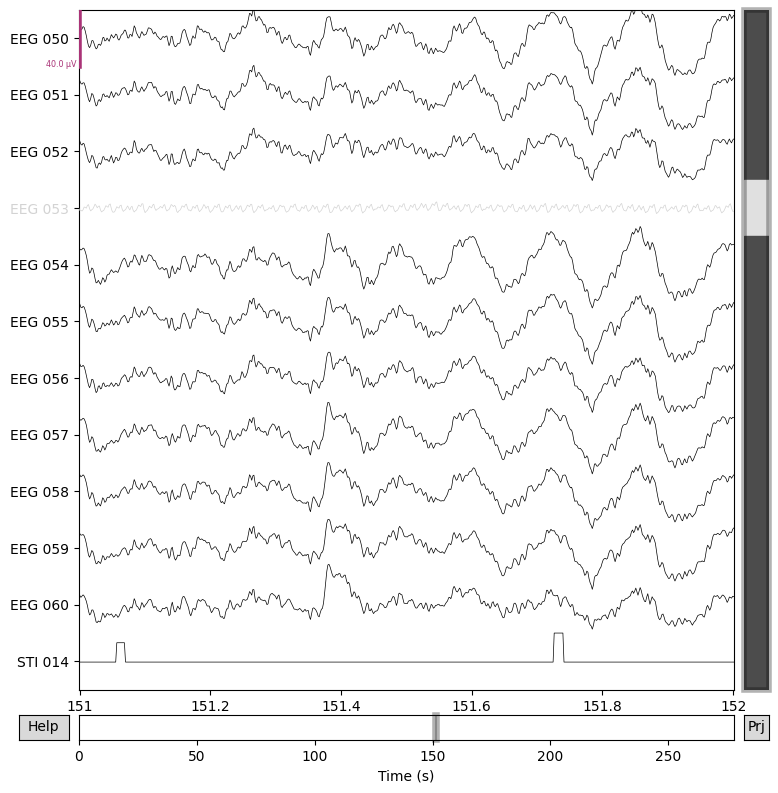

In [17]:
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060', 'STI 014']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg_stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [18]:
# TODO How many stimulus events do you observe?
# TODO: The graph above shows that there are two stimulus events.

In [19]:
# TODO Please estimate the time between the first stimulus and brain activity response.
# TODO: The difference in time is about 0.3 seconds.

**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [20]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1,
              'auditory/right': 2,
              'visual/left': 3,
              'visual/right': 4,
              'face': 5,
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


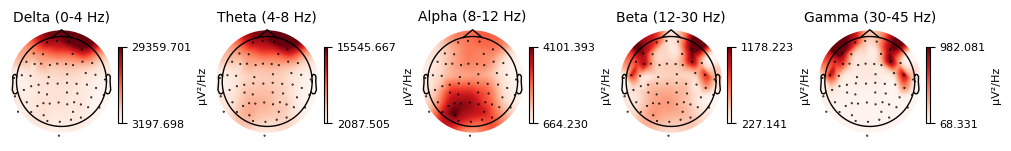

In [21]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


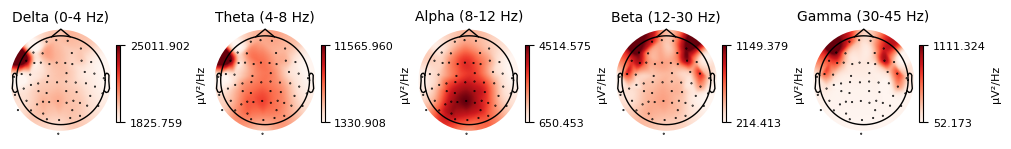

In [22]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [23]:
# TODO Please visualize the average brain activity when the subject pushes the button

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


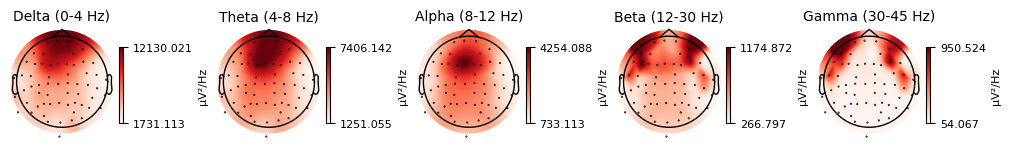

In [24]:
button_activity = epochs['button'].plot_psd_topomap()

In [25]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
#While the visual/right and face events are similar, I did not anticipate seeing distinct differences in the db range of each waveform at the button event.
#The button event has a somewhat greater db range than the other events, in particular.The high-dB regions during the button event are also centered in the frontal lobe, as opposed to the other events, which usually involve high-dB regions in the parietal and occipital lobes.
# TODO Which brain region seems active during the button event?
#The area of the brain that seems to be busiest is the frontal lobe.

# Hint: visual/right and face seem more similar to the button event. Think about why?

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [26]:
# TODO Please go back to Task 3. Can you figure out which event types happened?

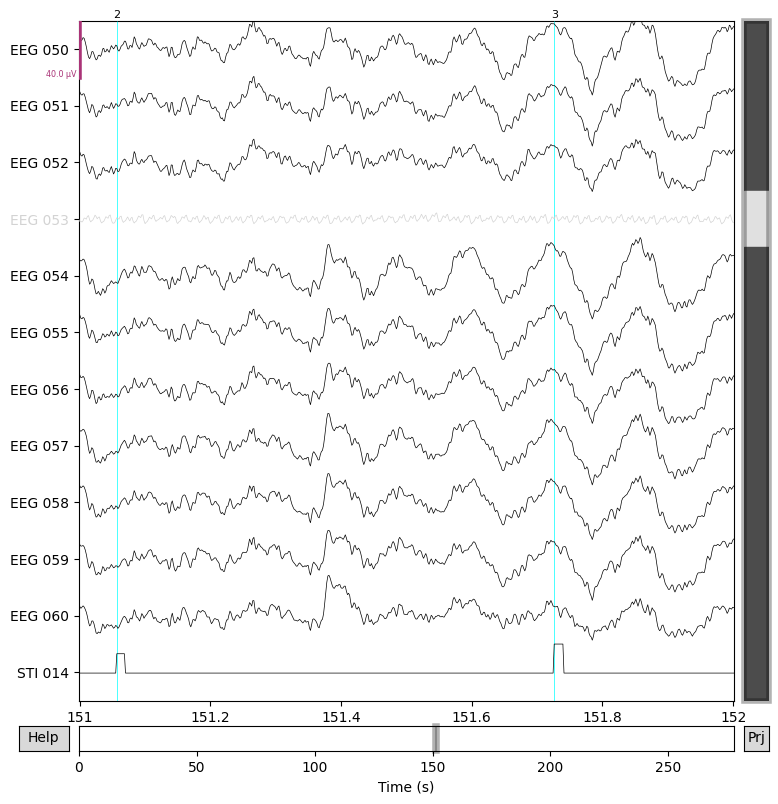

In [27]:
activity = raw.plot(order = chan_idxs, start = 151, duration = 1, events = events)

I can see that there are two events occurring here: event 2 is related to auditory/right stimuli, while event 3 is related to visual/left stimuli.


In [28]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#